<a href="https://colab.research.google.com/github/johntanas/it1244project/blob/main/code/label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
onlinedataset=True
if onlinedataset:
  url = "https://drive.google.com/file/d/1TBcW6O9KMRMh9CWf36OIjZwvY-qzH1VS/view?usp=sharing"
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  credit_record=pd.read_csv(url,index_col=0)
  url = "https://drive.google.com/file/d/1Ktdv2NTyK2AM48yBvbpFezd82-srqj7w/view?usp=sharing"
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  cleaned_app_df=pd.read_csv(url,index_col=0)
else:
  pathtodataset="./content/application.csv"
  credit_record=pd.read_csv(pathtodataset,index_col=0)
  pathtoapp="./content/cleaned_application.csv"
  cleaned_app_df=pd.read_csv(pathtoapp,index_col=0)

In [3]:
credit_record

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
credit_record["month_bal"].unique(),credit_record["status"].unique()

(array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
        -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
        -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
        -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
        -52, -53, -54, -55, -56, -57, -58, -59, -60]),
 array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object))

In [6]:
credit_record["to_int"]=credit_record.apply(lambda x: to_int_keys[x["status"]],axis=1)

In [7]:
nlp=credit_record.groupby("id").agg({"to_int" : ''.join})

In [8]:
credit_record

,id,month_bal,status,to_int
0,5001711,0,X,6
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,7
...,...,...,...,...
1048570,5150487,-25,C,7
1048571,5150487,-26,C,7
1048572,5150487,-27,C,7
1048573,5150487,-28,C,7


In [ ]:
good_records=["X","0","C"]

In [9]:
to_avg={"X":-1,"C":0}
for i in range(6):
  to_avg[str(i)]=i+1

In [17]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [13]:
credit_record["int"]=credit_record.apply(lambda x: to_avg[x["status"]],axis=1)

In [31]:
series=credit_record.groupby("id").apply(lambda x: sum(x["int"])/len(x))

In [32]:
X=np.array(series).reshape(-1,1)

In [22]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

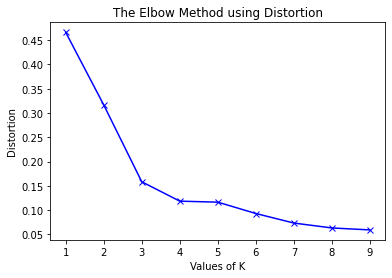

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

It seems K=3 is the elbow

In [24]:
kmeanModel = KMeans(n_clusters=3).fit(X)
kmeanModel.fit(X)

KMeans(n_clusters=3)

In [33]:
df=pd.DataFrame(series)

In [34]:
df

,0
id,
5001711,0.500000
5001712,0.526316
5001713,-1.000000
5001714,-1.000000
5001715,-1.000000
...,...
5150482,0.666667
5150483,-1.000000
5150484,0.923077


In [38]:
kmeanModel.cluster_centers_

array([[ 0.1875126 ],
       [-0.89861254],
       [ 0.88104327]])

In [35]:
df["label"]=kmeanModel.labels_

In [36]:
df

,0,label
id,,
5001711,0.500000,0
5001712,0.526316,0
5001713,-1.000000,1
5001714,-1.000000,1
5001715,-1.000000,1
...,...,...
5150482,0.666667,2
5150483,-1.000000,1
5150484,0.923077,2


We can also try kmeans on the exponential moving average!

In [37]:
credit_record

,id,month_bal,status,to_int,int
0,5001711,0,X,6,-1
1,5001711,-1,0,0,1
2,5001711,-2,0,0,1
3,5001711,-3,0,0,1
4,5001712,0,C,7,0
...,...,...,...,...,...
1048570,5150487,-25,C,7,0
1048571,5150487,-26,C,7,0
1048572,5150487,-27,C,7,0
1048573,5150487,-28,C,7,0


In [48]:
credit_record.groupby("id")["int"].ewm(com=1).mean().groupby("id").iloc[-1]

AttributeError: ignored